In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
# import cv2
import pandas as pd

In [43]:
import keras
import numpy as np
from keras.applications import resnet50
#Load the ResNet50 model
# resnet_model = resnet50.ResNet50(weights='imagenet')
# resnet_model = resnet50.ResNet50(weights='None')
resnet_model = resnet50.ResNet50(weights= None, include_top=False, input_shape=(101,1000,3))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [4]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [33]:
filename = 'images/cat.jpg'
# load an image in PIL format
# original_image = load_img(filename, target_size=(224, 224))
FstImgDir = os.path.join(trainDir, os.listdir(trainDir)[0])
singleImg = os.path.join(FstImgDir, os.listdir(FstImgDir)[0])
print(singleImg)
training_image = load_img(singleImg, target_size=(224,224)) 
# training_image = load_img(singleImg, target_size=(100,1000)) # IMAGE DIMENSIONS NOT RECOGNISED

/home/ec2-user/workspace/Aaron-Workspace/FilteredImages2/train/415_AUDIO_Participant/415_AUDIO_Participant(0-80000).png


In [34]:
# convert the PIL image (width, height) to a NumPy array (height, width, channel)
numpy_image = img_to_array(training_image)
# print(numpy_image)
input_image = np.expand_dims(numpy_image, axis=0)

PIL image size =  (1000, 100)
NumPy image size =  (100, 1000, 3)
Input image size =  (1, 100, 1000, 3)


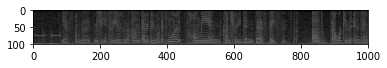

In [35]:
print('PIL image size = ', training_image.size)
print('NumPy image size = ', numpy_image.shape)
print('Input image size = ', input_image.shape)
plt.imshow(np.uint8(input_image[0]))

In [36]:
processed_image_resnet50 = resnet50.preprocess_input(input_image.copy())

In [37]:
predictions_resnet50 = resnet_model.predict(processed_image_resnet50)
label_resnet50 = decode_predictions(predictions_resnet50)
print ('label_resnet50 = ', label_resnet50)

ValueError: Error when checking input: expected input_1 to have shape (224, 224, 3) but got array with shape (100, 1000, 3)

In [2]:
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend" #for GPU Support on MacBook

In [32]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
currentDir = os.getcwd()
datasetDir = currentDir + "/FilteredImages/"
datasetDir = currentDir + "/FilteredImages2/" # NEW SINGLE IMAGES DIRECTORY
trainDir = os.path.join(datasetDir, "train")
testDir = os.path.join(datasetDir, "test")
validDir = os.path.join(datasetDir, "valid")
y_dataDir = os.path.join(datasetDir, "y_data")

In [7]:
def sortFirst(val):
    return val[0]

def getBinary(dataFile):
    listOfTraining = []
    trainingHeader = []
    with open(dataFile) as csvfile:
#     reader = csv.DictReader(csvfile)
        reader2 = csv.reader(csvfile)
        listOfTraining = list(reader2)
        trainingHeader = listOfTraining[0]
        listOfTraining.pop(0)
#         listOfTraining = listOfTraining.sort(key = sortFirst, reverse = False)
#         np.asarray(listofTraining, dtype=np.int32)
#         return np.asarray(listofTraining, dtype=np.int32)
    listOfTrainingBinary = []
    for item in listOfTraining:
        listOfTrainingBinary.append(item[1])
    return np.asarray(listOfTrainingBinary, dtype=np.int32)

In [8]:
y_train = []
y_trainDir = os.path.join(y_dataDir, 'train_split_Depression_AVEC2017-edited.csv')
# print(y_trainDir)
y_train = getBinary(y_trainDir)
y_testDir = os.path.join(y_dataDir, 'dev_split_Depression_AVEC2017.csv')
# print(y_testDir)
y_test = getBinary(y_testDir)
print(y_train)
print(y_test)

# Y_train = np.asarray(y_train, dtype=np.int32)

[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0]


In [9]:
x_trainDir = trainDir
x_testDir = testDir

In [10]:
x_trainDir

'/home/ec2-user/workspace/Aaron-Workspace/FilteredImages2/train'

In [11]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import backend as K
from keras.callbacks import TensorBoard

import tensorflow as tf

In [9]:
input_shape = (101, 1000, 3)

# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# model.summary()


# TAKEN FROM DEPRESSION DETECT
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='valid', strides=1,
                 input_shape=input_shape, activation='relu'))

# model.add(GlobalAveragePooling2D(data_format='channels_last'))

# model.add(MaxPooling2D(pool_size=(4, 3), strides=(1, 3)))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 3)))
model.add(Conv2D(32, (1, 3), padding='valid', strides=1,
          input_shape=input_shape, activation='relu'))

#model.add(GlobalAveragePooling2D(data_format=(32, (101, 1000, 3))
model.add(GlobalAveragePooling2D(data_format='channels_last'))
#model.add(MaxPooling2D(pool_size=(1, 3), strides=(1, 3)))

#model.add(Flatten())
# model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('softmax'))
# model.add(Activation(tf.nn.softmax)) #fixes axis error for softmax

# model.compile(loss='sparse_categorical_crossentropy',
#              optimizer='adadelta',
#              metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy',
#               optimizer='adadelta',
#               metrics=['accuracy'])

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop', #DO NOT USE RSMPROP VERY BAD OPTIMISATION
#               metrics=['accuracy'])

model.compile(loss='mean_squared_error',
              optimizer='adadelta', #adam
              metrics=['accuracy']) 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 99, 998, 32)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 99, 996, 32)       3104      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total para

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator()

# train_datagen = keras.utils.Sequence()

train_generator = train_datagen.flow_from_directory(
        x_trainDir,
        target_size=(101, 1000),
        batch_size=32,
        class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
        x_testDir,
        target_size=(101, 1000),
        batch_size=32,
        class_mode='binary')

Found 103 images belonging to 103 classes.
Found 35 images belonging to 35 classes.


In [12]:
#Changes the class values generated from the generator
def updateBinary(generator, y_binary):
    counter = 0
    for k,v in generator.class_indices.items():
        generator.class_indices[k] = y_binary[counter]
        counter += 1

# counter = 0
# for k,v in train_generator.class_indices.items():
#     train_generator.class_indices[k] = y_train[counter]
#     counter += 1        

In [14]:
# for k,v in train_generator.class_indices.items():
#     print(k,v)

In [15]:
for item in validation_generator.class_indices.items():
    print(item)

('302_AUDIO_Participant', 0)
('307_AUDIO_Participant', 0)
('331_AUDIO_Participant', 0)
('335_AUDIO_Participant', 1)
('346_AUDIO_Participant', 1)
('367_AUDIO_Participant', 1)
('377_AUDIO_Participant', 1)
('381_AUDIO_Participant', 1)
('382_AUDIO_Participant', 0)
('388_AUDIO_Participant', 1)
('389_AUDIO_Participant', 1)
('390_AUDIO_Participant', 0)
('395_AUDIO_Participant', 0)
('403_AUDIO_Participant', 0)
('404_AUDIO_Participant', 0)
('406_AUDIO_Participant', 0)
('413_AUDIO_Participant', 1)
('417_AUDIO_Participant', 0)
('418_AUDIO_Participant', 1)
('420_AUDIO_Participant', 0)
('422_AUDIO_Participant', 1)
('436_AUDIO_Participant', 0)
('439_AUDIO_Participant', 0)
('440_AUDIO_Participant', 1)
('451_AUDIO_Participant', 0)
('458_AUDIO_Participant', 0)
('472_AUDIO_Participant', 0)
('476_AUDIO_Participant', 0)
('477_AUDIO_Participant', 0)
('482_AUDIO_Participant', 0)
('483_AUDIO_Participant', 1)
('484_AUDIO_Participant', 0)
('489_AUDIO_Participant', 0)
('490_AUDIO_Participant', 0)
('492_AUDIO_Pa

In [14]:
#updates each folder with the corresponding binary for depression/non-depression cases
updateBinary(train_generator, y_train)
updateBinary(validation_generator, y_test)

In [17]:
# for k,v in train_generator.class_indices.items():
#     print(k,v)

In [17]:
#Saving Model
from keras.callbacks import ModelCheckpoint

model_path = os.path.join(currentDir,'DepressionAnalysisModel5 (NEW SINGLE IMG)2.h5')

# checkpoint = ModelCheckpoint(model_path, monitor='loss', verbose=1, save_best_only=True, mode='max')

# checkpoint = ModelCheckpoint(model_path, monitor='acc', verbose=1, save_best_only=True, mode='max')

checkpoint = ModelCheckpoint(model_path, monitor='acc', verbose=1, save_best_only=False, save_weights_only=False, mode='auto')
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

callbacks_list = [checkpoint, tbCallBack]

In [19]:
# input_shape

In [18]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=2000,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=800)

numOfSteps = 500
numOfEpoch = 50
numOfValidation = 20
batchSize = 32

model.fit_generator(
        train_generator,
        steps_per_epoch=numOfSteps,
        callbacks=callbacks_list,
#         batch_size=batchSize
        epochs=numOfEpoch,
        validation_data=validation_generator,
        validation_steps=numOfValidation)

Epoch 1/50
500/500 [==============================] - 73s 146ms/step - loss: 3381.5972 - acc: 0.0100 - val_loss: 358.0000 - val_acc: 0.0286

Epoch 00002: saving model to /home/ec2-user/workspace/Aaron-Workspace/DepressionAnalysisModel5 (NEW SINGLE IMG)2.h5
Epoch 3/50
500/500 [==============================] - 73s 146ms/step - loss: 3375.3307 - acc: 0.0092 - val_loss: 358.0000 - val_acc: 0.0286

Epoch 00003: saving model to /home/ec2-user/workspace/Aaron-Workspace/DepressionAnalysisModel5 (NEW SINGLE IMG)2.h5
Epoch 4/50
500/500 [==============================] - 73s 146ms/step - loss: 3370.7836 - acc: 0.0094 - val_loss: 358.0000 - val_acc: 0.0286

Epoch 00004: saving model to /home/ec2-user/workspace/Aaron-Workspace/DepressionAnalysisModel5 (NEW SINGLE IMG)2.h5
Epoch 5/50
500/500 [==============================] - 73s 146ms/step - loss: 3359.8405 - acc: 0.0096 - val_loss: 358.0000 - val_acc: 0.0286

Epoch 00005: saving model to /home/ec2-user/workspace/Aaron-Workspace/DepressionAnalysis

500/500 [==============================] - 73s 146ms/step - loss: 3349.3289 - acc: 0.0100 - val_loss: 358.0000 - val_acc: 0.0286

Epoch 00034: saving model to /home/ec2-user/workspace/Aaron-Workspace/DepressionAnalysisModel5 (NEW SINGLE IMG)2.h5
Epoch 35/50
500/500 [==============================] - 73s 146ms/step - loss: 3409.4968 - acc: 0.0096 - val_loss: 358.0000 - val_acc: 0.0286

Epoch 00035: saving model to /home/ec2-user/workspace/Aaron-Workspace/DepressionAnalysisModel5 (NEW SINGLE IMG)2.h5
Epoch 36/50
500/500 [==============================] - 73s 146ms/step - loss: 3340.5507 - acc: 0.0094 - val_loss: 358.0000 - val_acc: 0.0286

Epoch 00036: saving model to /home/ec2-user/workspace/Aaron-Workspace/DepressionAnalysisModel5 (NEW SINGLE IMG)2.h5
Epoch 37/50
500/500 [==============================] - 73s 146ms/step - loss: 3389.6015 - acc: 0.0092 - val_loss: 358.0000 - val_acc: 0.0286

Epoch 00037: saving model to /home/ec2-user/workspace/Aaron-Workspace/DepressionAnalysisModel5 (

In [19]:
model.save("50Epoch (NEW SINGLE IMAGE DIR)2.h5")

In [22]:
# # model.fit_generator(
# #         train_generator,
# #         steps_per_epoch=2000,
# #         epochs=50,
# #         validation_data=validation_generator,
# #         validation_steps=800)

# numOfSteps = 500
# numOfEpoch = 30
# numOfValidation = 100
# batchSize = 32

# # model.fit_generator(
# #         train_generator,
# #         steps_per_epoch=numOfSteps,
# #         callbacks=callbacks_list,
# # #         batch_size=batchSize
# #         epochs=numOfEpoch,
# #         validation_data=validation_generator,
# #         validation_steps=numOfValidation)

In [23]:
# model.summary()

In [24]:
# from keras.models import load_model

# model.save(os.path.join(currentDir,'DepressionAnalysisModel2 after 7 epoch.h5'))  # creates a HDF5 file
# #del model  # deletes the existing model

# # returns a compiled model
# # identical to the previous one
# #model = load_model(os.join.path(currentDir,'my_model.h5'))